# <font color=blue>Solutions for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [2]:
education_df = pd.read_csv('../data/states_all.csv')

Verilerimiz zaman bazında olduğu için interpolasyon uygun olacaktır. Ancak bir önceki veri başka bir eyalet olması durumunda veri tutarlı olmayacaktır. Bu yüzden eyalet bazında enterpolasyon daha doğru olacaktır.

In [3]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

education_df.dropna(inplace=True)

**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

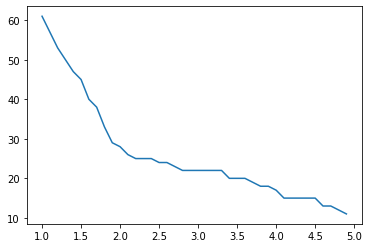

In [4]:
q75, q25 = np.percentile(education_df["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

thresh_holds= []

for thresh_hold in np.arange(1,5,0.1):
    min_value = q25 - (iqr*thresh_hold)
    max_value = q75 + (iqr*thresh_hold)
    number_of_outlier = len((np.where((education_df["TOTAL_REVENUE"] > max_value)| 
                                       (education_df["TOTAL_REVENUE"] < min_value))[0]))
    thresh_holds.append((thresh_hold, number_of_outlier))
df = pd.DataFrame(thresh_holds, columns = ['thresh_hold', 'number'])
plt.plot(df.thresh_hold, df.number)
plt.show()

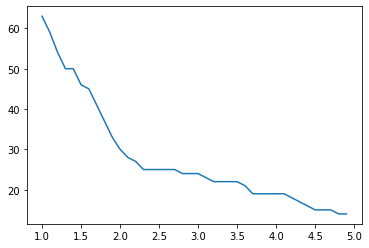

In [5]:
q75, q25 = np.percentile(education_df["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

thresh_holds= []

for thresh_hold in np.arange(1,5,0.1):
    min_value = q25 - (iqr*thresh_hold)
    max_value = q75 + (iqr*thresh_hold)
    number_of_outlier = len((np.where((education_df["TOTAL_EXPENDITURE"] > max_value)| 
                                       (education_df["TOTAL_EXPENDITURE"] < min_value))[0]))
    thresh_holds.append((thresh_hold, number_of_outlier))
df = pd.DataFrame(thresh_holds, columns = ['thresh_hold', 'number'])
plt.plot(df.thresh_hold, df.number)
plt.show()

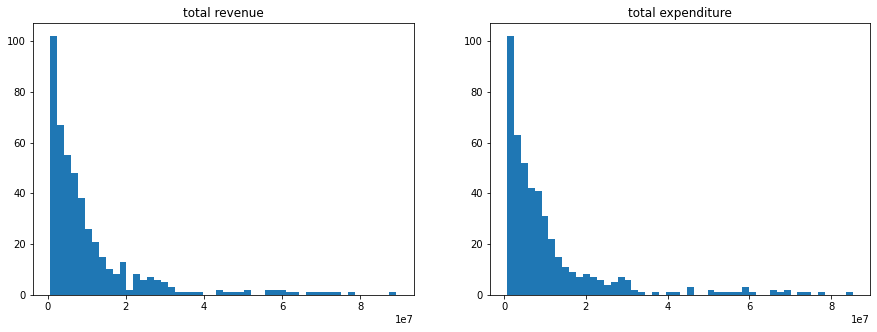

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education_df["TOTAL_REVENUE"], bins = 50)
plt.title("total revenue")

plt.subplot(1,2,2)
plt.hist(education_df["TOTAL_EXPENDITURE"], bins = 50)
plt.title("total expenditure")
plt.show()

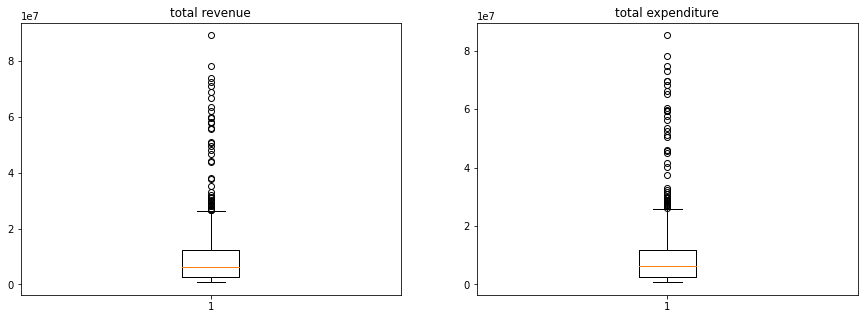

In [7]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education_df["TOTAL_REVENUE"])
plt.title("total revenue")

plt.subplot(1,2,2)
plt.boxplot(education_df["TOTAL_EXPENDITURE"])
plt.title("total expenditure")
plt.show()

**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

Winsorize işlemi yapalım ve **winsorize_revenue** ve **winsorized_expenditure** olarak iki değişken yapalım.

In [8]:
from scipy.stats.mstats import winsorize

winsorize_revenue = winsorize(education_df["TOTAL_REVENUE"], (0, 0.05))

winsorize_expenditure = winsorize(education_df["TOTAL_EXPENDITURE"], (0, 0.05))

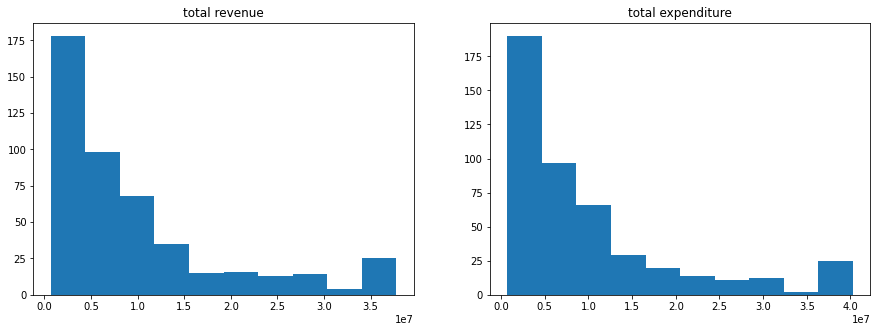

In [9]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(winsorize_revenue)
plt.title("total revenue")

plt.subplot(1,2,2)
plt.hist(winsorize_expenditure)
plt.title("total expenditure")
plt.show()

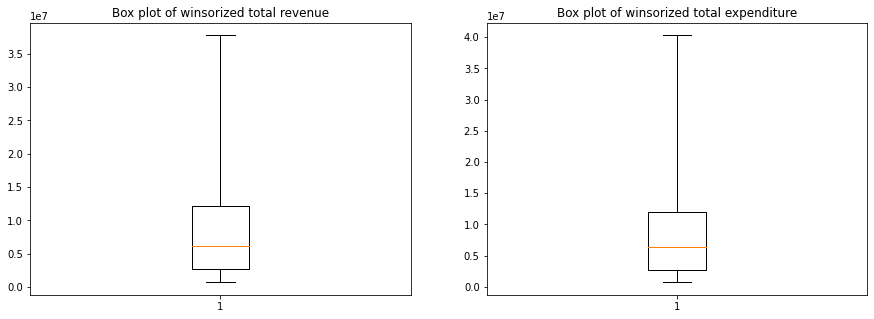

In [10]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorize_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorize_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

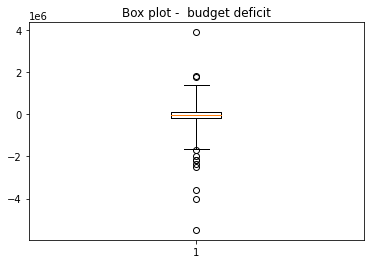

In [11]:
budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

plt.boxplot(budget_deficit, whis = 5)
plt.title("Box plot -  budget deficit")
plt.show()

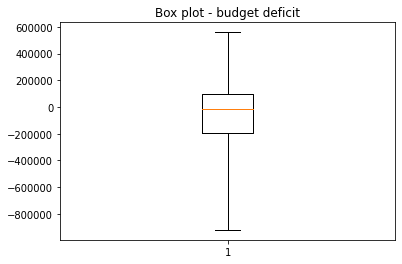

In [12]:
winsorize_budget = winsorize(budget_deficit, (0.05, 0.05))

plt.boxplot(winsorize_budget, whis = 5)
plt.title("Box plot - budget deficit")
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

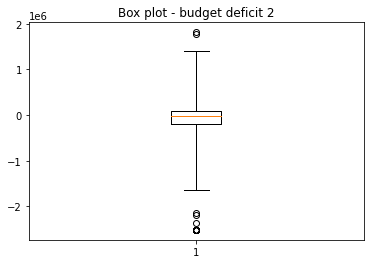

In [13]:
budget_deficit2 = winsorize_revenue - winsorize_expenditure

plt.boxplot(budget_deficit2, whis = 5)
plt.title("Box plot - budget deficit 2")
plt.show()

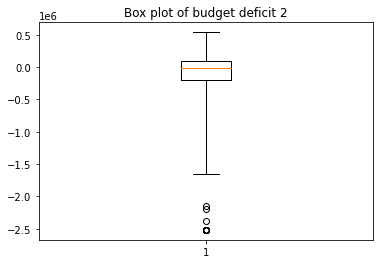

In [14]:
winsorize_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

plt.boxplot(winsorize_budget2, whis = 5)
plt.title("Box plot of budget deficit 2")
plt.show()

Çoğu değeri eledik. Alt eşiği artırırsek bu değerleri de elimine edebiliriz. Ancak ikisini karşılaştırabilmek açısından %5 olarak tutmak daha uygun gibi.

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

In [15]:
pd.DataFrame({"original_budget": budget_deficit, "winsorize_budget1": winsorize_budget,
              "winsorize_budget2": winsorize_budget2}).describe()

,original_budget,winsorize_budget1,winsorize_budget2
count,466.00,466.00,466.00
mean,-83297.61,-61210.33,-173635.99
std,614896.18,342588.03,650274.04
min,-5487742.00,-921134.00,-2518429.00
25%,-196574.75,-196574.75,-204775.00
50%,-12823.50,-12823.50,-14600.50
75%,98523.50,98523.50,91848.00
max,3897129.00,560511.00,540055.00


- Aralarında önemli farklılıklar var. Bu yüzden hangi işlemin önce yapılacağı önemli

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

- Önce ihtiyaç duyduğumuz değişkeni oluşturmak daha doğru sonuç verecektir. 3.sorudaki yöntemi tercih etmek gerekir.